##  An Empirical Comparison of Machine Learning Models for Early Prediction of Unemployment Rates Across Countries

In [2]:
%pip install scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [3]:
df_data = pd.read_csv("Unemployment_Rate_Dataset.csv") # Load dataset
df_data.head(20)

,Country Name,Country Code,Indicator Name,Indicator Code,1991,1992,1993,1994,1995,1996,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Aruba,ABW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,8.179629,8.270724,8.266327,8.138291,7.908446,7.823908,...,7.036357,7.194666,7.346331,7.360513,7.584419,8.191395,8.577385,7.985202,7.806365,7.772654
2,Afghanistan,AFG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,8.070000,8.011000,7.888000,7.822000,7.817000,7.867000,...,9.052000,10.133000,11.184000,11.196000,11.185000,11.710000,11.994000,14.100000,13.991000,13.295000
3,Africa Western and Central,AFW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,4.158680,4.251102,4.369805,4.393781,4.399749,4.340691,...,4.164467,4.157574,4.274196,4.323631,4.395271,4.852393,4.736732,3.658573,3.277245,3.218313
4,Angola,AGO,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,16.855000,16.978000,17.399000,17.400000,16.987000,16.275000,...,16.490000,16.575000,16.610000,16.594000,16.497000,16.690000,15.799000,14.602000,14.537000,14.464000
5,Albania,ALB,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,10.304000,30.007000,25.251000,20.835000,14.607000,13.928000,...,17.193000,15.418000,13.616000,12.304000,11.466000,11.690000,11.474000,10.137000,10.108000,10.250000
6,Andorra,AND,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Arab World,ARB,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,11.914508,12.160385,12.918274,13.025172,13.516863,12.477178,...,11.148914,10.856290,11.113108,10.659740,10.216098,11.325613,10.889659,9.953571,9.581397,9.461238
8,United Arab Emirates,ARE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,1.625000,1.713000,1.905000,1.836000,1.800000,1.834000,...,1.793000,1.640000,2.462000,2.236000,2.331000,4.294000,3.105000,2.872000,2.151000,2.133000
9,Argentina,ARG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,5.440000,6.360000,10.100000,11.760000,18.800000,17.110000,...,7.579000,8.085000,8.347000,9.220000,9.843000,11.461000,8.736000,6.805000,6.139000,7.876000


In [4]:
df_data.shape 

(266, 38)

In [5]:
df_data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022', '2023', '2024'],
      dtype='object')

In [6]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1991            235 non-null    float64
 5   1992            235 non-null    float64
 6   1993            235 non-null    float64
 7   1994            235 non-null    float64
 8   1995            235 non-null    float64
 9   1996            235 non-null    float64
 10  1997            235 non-null    float64
 11  1998            235 non-null    float64
 12  1999            235 non-null    float64
 13  2000            235 non-null    float64
 14  2001            235 non-null    float64
 15  2002            235 non-null    float64
 16  2003            235 non-null    float64
 17  2004            235 non-null    flo

In [7]:
df_data.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1991              float64
1992              float64
1993              float64
1994              float64
1995              float64
1996              float64
1997              float64
1998              float64
1999              float64
2000              float64
2001              float64
2002              float64
2003              float64
2004              float64
2005              float64
2006              float64
2007              float64
2008              float64
2009              float64
2010              float64
2011              float64
2012              float64
2013              float64
2014              float64
2015              float64
2016              float64
2017              float64
2018              float64
2019              float64
2020              float64
2021              float64
2022              float64
2023              float64
2024              float64
dtype: objec

In [8]:
df_data.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,1991,1992,1993,1994,1995,1996,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
261,Kosovo,XKX,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,8.409,8.342,8.344,8.340,8.988,9.585,...,17.900,18.416,18.603,17.584,17.202,17.953,18.287,17.363,17.091,17.086
263,South Africa,ZAF,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,23.002,23.262,23.179,22.942,22.647,22.480,...,25.149,26.536,27.035,26.906,28.468,29.217,34.007,33.268,32.098,33.168
264,Zambia,ZMB,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,18.900,19.544,19.700,18.648,16.828,15.300,...,5.942,5.239,4.529,5.033,5.542,6.033,5.199,5.995,5.905,5.961
265,Zimbabwe,ZWE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,4.813,4.938,4.990,4.960,5.571,6.163,...,5.377,5.886,6.344,6.793,7.373,8.621,9.540,10.087,8.759,8.554


In [9]:
df_data.describe()

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
count,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,...,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,234.000000,232.000000,230.000000
mean,7.309450,7.657994,8.077971,8.228115,8.271647,8.382771,8.268826,8.305579,8.456762,8.333982,...,7.802640,7.667339,7.452974,7.206506,7.064106,8.121189,7.809688,6.949933,6.606764,6.521012
std,5.565850,5.866918,5.923331,5.833094,5.893925,5.899470,5.734063,5.659025,5.668398,5.699568,...,5.474281,5.369211,5.253675,5.205504,5.132942,5.498414,5.491331,5.285512,5.040455,5.007064
min,0.600000,0.596000,0.610000,0.617000,0.632000,0.616000,0.631000,0.645000,0.652000,0.634000,...,0.170000,0.150000,0.140000,0.110000,0.100000,0.140000,0.140000,0.130000,0.130000,0.126000
25%,3.091500,3.369500,3.877935,4.072500,4.130000,4.231500,4.176439,4.296083,4.443411,4.295584,...,4.227734,4.199787,4.016000,3.821267,3.707500,4.455500,4.452500,3.728500,3.563250,3.434000
50%,6.079498,6.316000,6.346000,6.889000,7.157000,7.222000,7.079000,7.187000,7.112627,6.776076,...,6.313000,6.029099,5.833000,5.511000,5.552000,6.690897,6.193192,5.469230,5.183500,5.077229
75%,9.574624,9.951500,10.687545,10.689339,10.490233,11.011518,10.850000,11.168500,11.654000,11.118000,...,9.838000,9.661000,9.239780,8.778789,8.833500,9.894745,9.469563,8.411122,7.979966,7.810413
max,30.228000,30.283000,30.348000,30.334000,35.600000,38.800000,36.000000,34.500000,32.400000,32.200000,...,27.695000,26.536000,27.035000,26.906000,28.468000,32.944000,34.153000,35.359000,35.086000,34.400000


In [10]:
# Define columns that are years (e.g., 1990 to 2024)
year_cols = [col for col in df_data.columns if col.isdigit()]
# Countries where all year columns are missing (NaN)
all_missing = df_data[df_data[year_cols].isnull().all(axis=1)]

# Show total count
num_all_missing = all_missing.shape[0]
print(f"Total number of countries missing ALL unemployment year data rate: {num_all_missing}")

# Optionally, show their names
all_missing[['Country Name']]




Total number of countries missing ALL unemployment year data rate: 31


,Country Name
0,Aruba
6,Andorra
11,American Samoa
12,Antigua and Barbuda
27,Bermuda
51,Curacao
52,Cayman Islands
57,Dominica
78,Faroe Islands
79,"Micronesia, Fed. Sts."


In [11]:
# Ensure 'Missing_Years' is computed
df_data['Missing_Years'] = df_data[year_cols].isnull().sum(axis=1)

# Select countries with some (but not all) missing years
partial_missing = df_data[
    (df_data['Missing_Years'] > 0) & (df_data['Missing_Years'] < len(year_cols))
][['Country Name', 'Missing_Years']]

# Total number of such countries
num_partial_missing = partial_missing.shape[0]
print(f"Total number of countries with partially missing unemployment data rate: {num_partial_missing}")

# Optionally, display the top 20
partial_missing = partial_missing.sort_values(by='Missing_Years', ascending=False)
partial_missing.head(20)


Total number of countries with partially missing unemployment data rate: 5


,Country Name,Missing_Years
248,Ukraine,3
196,West Bank and Gaza,2
206,Sudan,2
130,Lebanon,1
216,South Sudan,1


In [12]:
# Select countries with no missing unemployment rates
countries_full_data = df_data[df_data['Missing_Years'] == 0][['Country Name']]

# Print the exact number of such countries
print(f"Countries with complete unemployment data rate: {len(countries_full_data)}")

# Optionally, display the first 20 country names
countries_full_data.head(20)



Countries with complete unemployment data rate: 230


,Country Name
1,Africa Eastern and Southern
2,Afghanistan
3,Africa Western and Central
4,Angola
5,Albania
7,Arab World
8,United Arab Emirates
9,Argentina
10,Armenia
13,Australia


#### Step 1: Handle Missing Data

##### Step 1.1 Drop Countries with all missing Data

In [13]:
# Drop countries missing ALL unemployment year data rate
year_cols = [col for col in df_data.columns if col.isdigit()]
df_cleaned = df_data.dropna(subset=year_cols, how='all').copy()



In [14]:
# Verify the number of remaining rows
print(f"Shape after removing countries with all missing data: {df_cleaned.shape}")

Shape after removing countries with all missing data: (235, 39)


##### 1.2 Handle Partially Missing Data

In [15]:
# Impute missing values using linear interpolation for each country
df_cleaned[year_cols] = df_cleaned[year_cols].interpolate(method='linear', axis=1, limit_direction='both')

# Check if any missing values remain in year columns
print(f"Remaining missing values in year columns: {df_cleaned[year_cols].isnull().sum().sum()}")



Remaining missing values in year columns: 0


In [16]:
# Verify no missing values remain
print(f"Final check for missing values: {df_cleaned[year_cols].isnull().sum().sum()}")

Final check for missing values: 0


##### 1.3 Drop Unnecessary Columns

In [17]:
# Drop non-essential columns
df_cleaned = df_cleaned.drop(columns=['Indicator Name', 'Indicator Code', 'Missing_Years'])

# Verify remaining columns
print(df_cleaned.columns)

Index(['Country Name', 'Country Code', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024'],
      dtype='object')


#### Step 2: Handle outliers

##### 2.1 Detect Outliers

In [18]:
# Standardize the year columns for outlier detection
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned[year_cols])

# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outlier_labels = iso_forest.fit_predict(scaled_data)

# Identify outlier rows
outliers = df_cleaned[outlier_labels == -1]
print(f"Number of outlier countries: {len(outliers)}")
print("Outlier countries:\n", outliers[['Country Name']])

Number of outlier countries: 12
Outlier countries:
                Country Name
24   Bosnia and Herzegovina
33                 Botswana
56                 Djibouti
60                  Algeria
70                    Spain
89                   Greece
157         North Macedonia
162              Montenegro
171                 Namibia
196      West Bank and Gaza
224                Eswatini
263            South Africa


#### 2.2 Handle Outliers 

In [19]:
# Cap outliers at the 5th and 95th percentiles
for col in year_cols:
    lower_bound = df_cleaned[col].quantile(0.05)
    upper_bound = df_cleaned[col].quantile(0.95)
    df_cleaned[col] = df_cleaned[col].clip(lower=lower_bound, upper=upper_bound)

# Verify the effect by checking the summary statistics
print(df_cleaned[year_cols].describe())

             1991        1992        1993        1994        1995        1996  \
count  235.000000  235.000000  235.000000  235.000000  235.000000  235.000000   
mean     7.157257    7.472724    7.886129    8.044121    8.049359    8.164448   
std      5.086335    5.252507    5.306188    5.212923    5.108611    5.105281   
min      1.085300    1.350000    1.430000    1.487900    1.471000    1.475800   
25%      3.091500    3.369500    3.877935    4.072500    4.130000    4.231500   
50%      6.079498    6.316000    6.346000    6.889000    7.157000    7.222000   
75%      9.574624    9.951500   10.687545   10.689339   10.490233   11.011518   
max     18.972000   19.544300   19.700000   20.051400   19.821100   20.447300   

             1997        1998        1999        2000  ...        2015  \
count  235.000000  235.000000  235.000000  235.000000  ...  235.000000   
mean     8.067197    8.102060    8.246348    8.107054  ...    7.660978   
std      5.002310    4.916805    4.902273    4.8

#### Step 3: Data Transformation for EDA

In [20]:
# Melt the dataframe to long format
df_long = pd.melt(
    df_cleaned,
    id_vars=['Country Name', 'Country Code'],
    value_vars=year_cols,
    var_name='Year',
    value_name='Unemployment Rate'
)

# Convert Year to numeric
df_long['Year'] = df_long['Year'].astype(int)

# Verify the transformation
print(df_long.head(30))
print(f"Shape of long dataframe: {df_long.shape}")

                   Country Name Country Code  Year  Unemployment Rate
0   Africa Eastern and Southern          AFE  1991           8.179629
1                   Afghanistan          AFG  1991           8.070000
2    Africa Western and Central          AFW  1991           4.158680
3                        Angola          AGO  1991          16.855000
4                       Albania          ALB  1991          10.304000
5                    Arab World          ARB  1991          11.914508
6          United Arab Emirates          ARE  1991           1.625000
7                     Argentina          ARG  1991           5.440000
8                       Armenia          ARM  1991           1.783000
9                     Australia          AUS  1991           9.586000
10                      Austria          AUT  1991           3.420000
11                   Azerbaijan          AZE  1991           1.085300
12                      Burundi          BDI  1991           3.158000
13                  

#### Step 4: Exploratory Data Analysis

##### 4.1 Global Unemployment Trend 

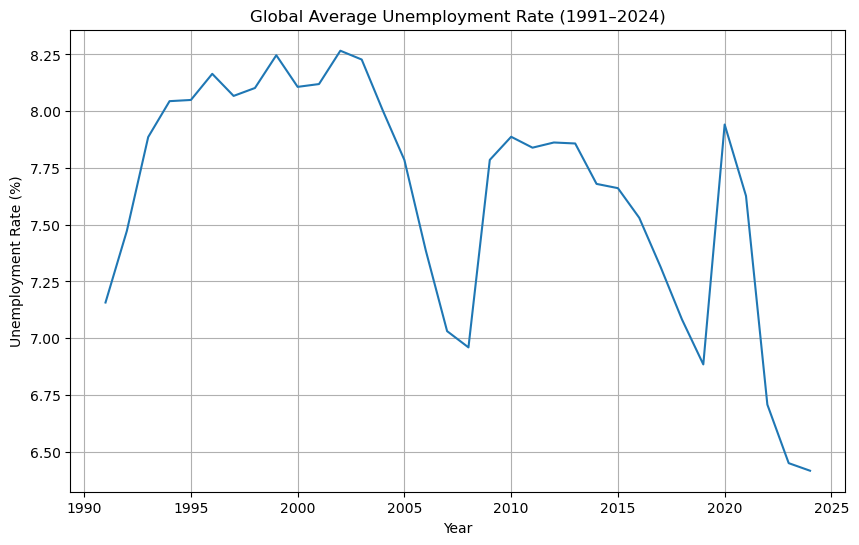

In [21]:
# Calculate mean unemployment rate by year
global_trend = df_long.groupby('Year')['Unemployment Rate'].mean().reset_index()

# Create a line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=global_trend, x='Year', y='Unemployment Rate')
plt.title('Global Average Unemployment Rate (1991–2024)')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()


# This plot shows how the global average unemployment rate changes over time,
# highlighting key trends such as spikes during major economic crises
# (e.g., the 2008–2009 financial crisis and the 2020 pandemic).

##### 4.2 Distribution of Unemployment Rates

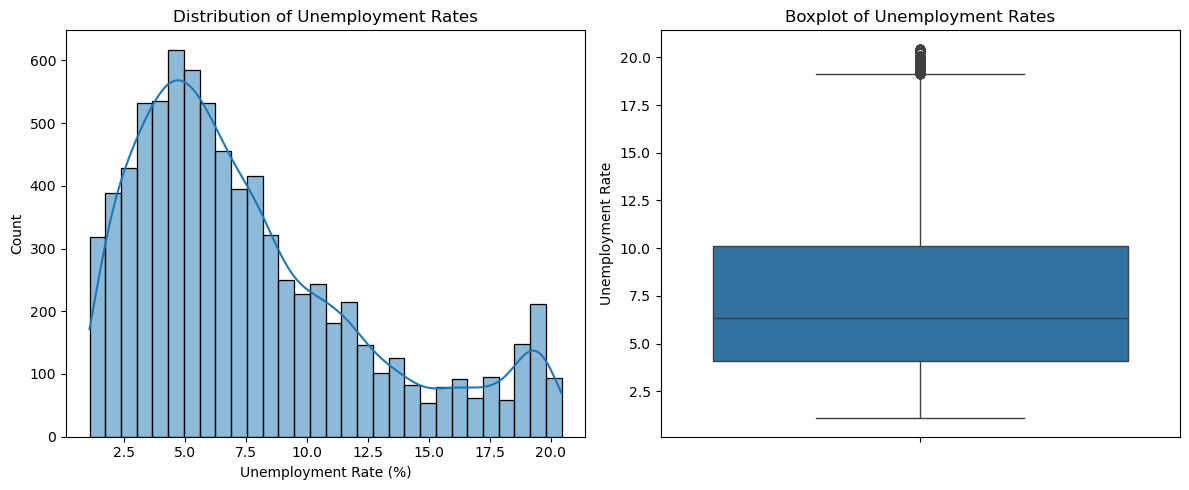

In [22]:
# Histogram: Displays the frequency distribution of unemployment rates,
# helping to identify skewness, spread, and the presence of multiple modes.
# Boxplot: Highlights the spread, median, and potential outliers (after capping).
# Plot histogram and boxplot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_long['Unemployment Rate'], bins=30, kde=True)
plt.title('Distribution of Unemployment Rates')
plt.xlabel('Unemployment Rate (%)')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_long['Unemployment Rate'])
plt.title('Boxplot of Unemployment Rates')

plt.tight_layout()
plt.show()






##### 4.3 Top and Bottom Countries (2024)

Identify countries with the highest and lowest unemployment rates in the most recent year (2024)

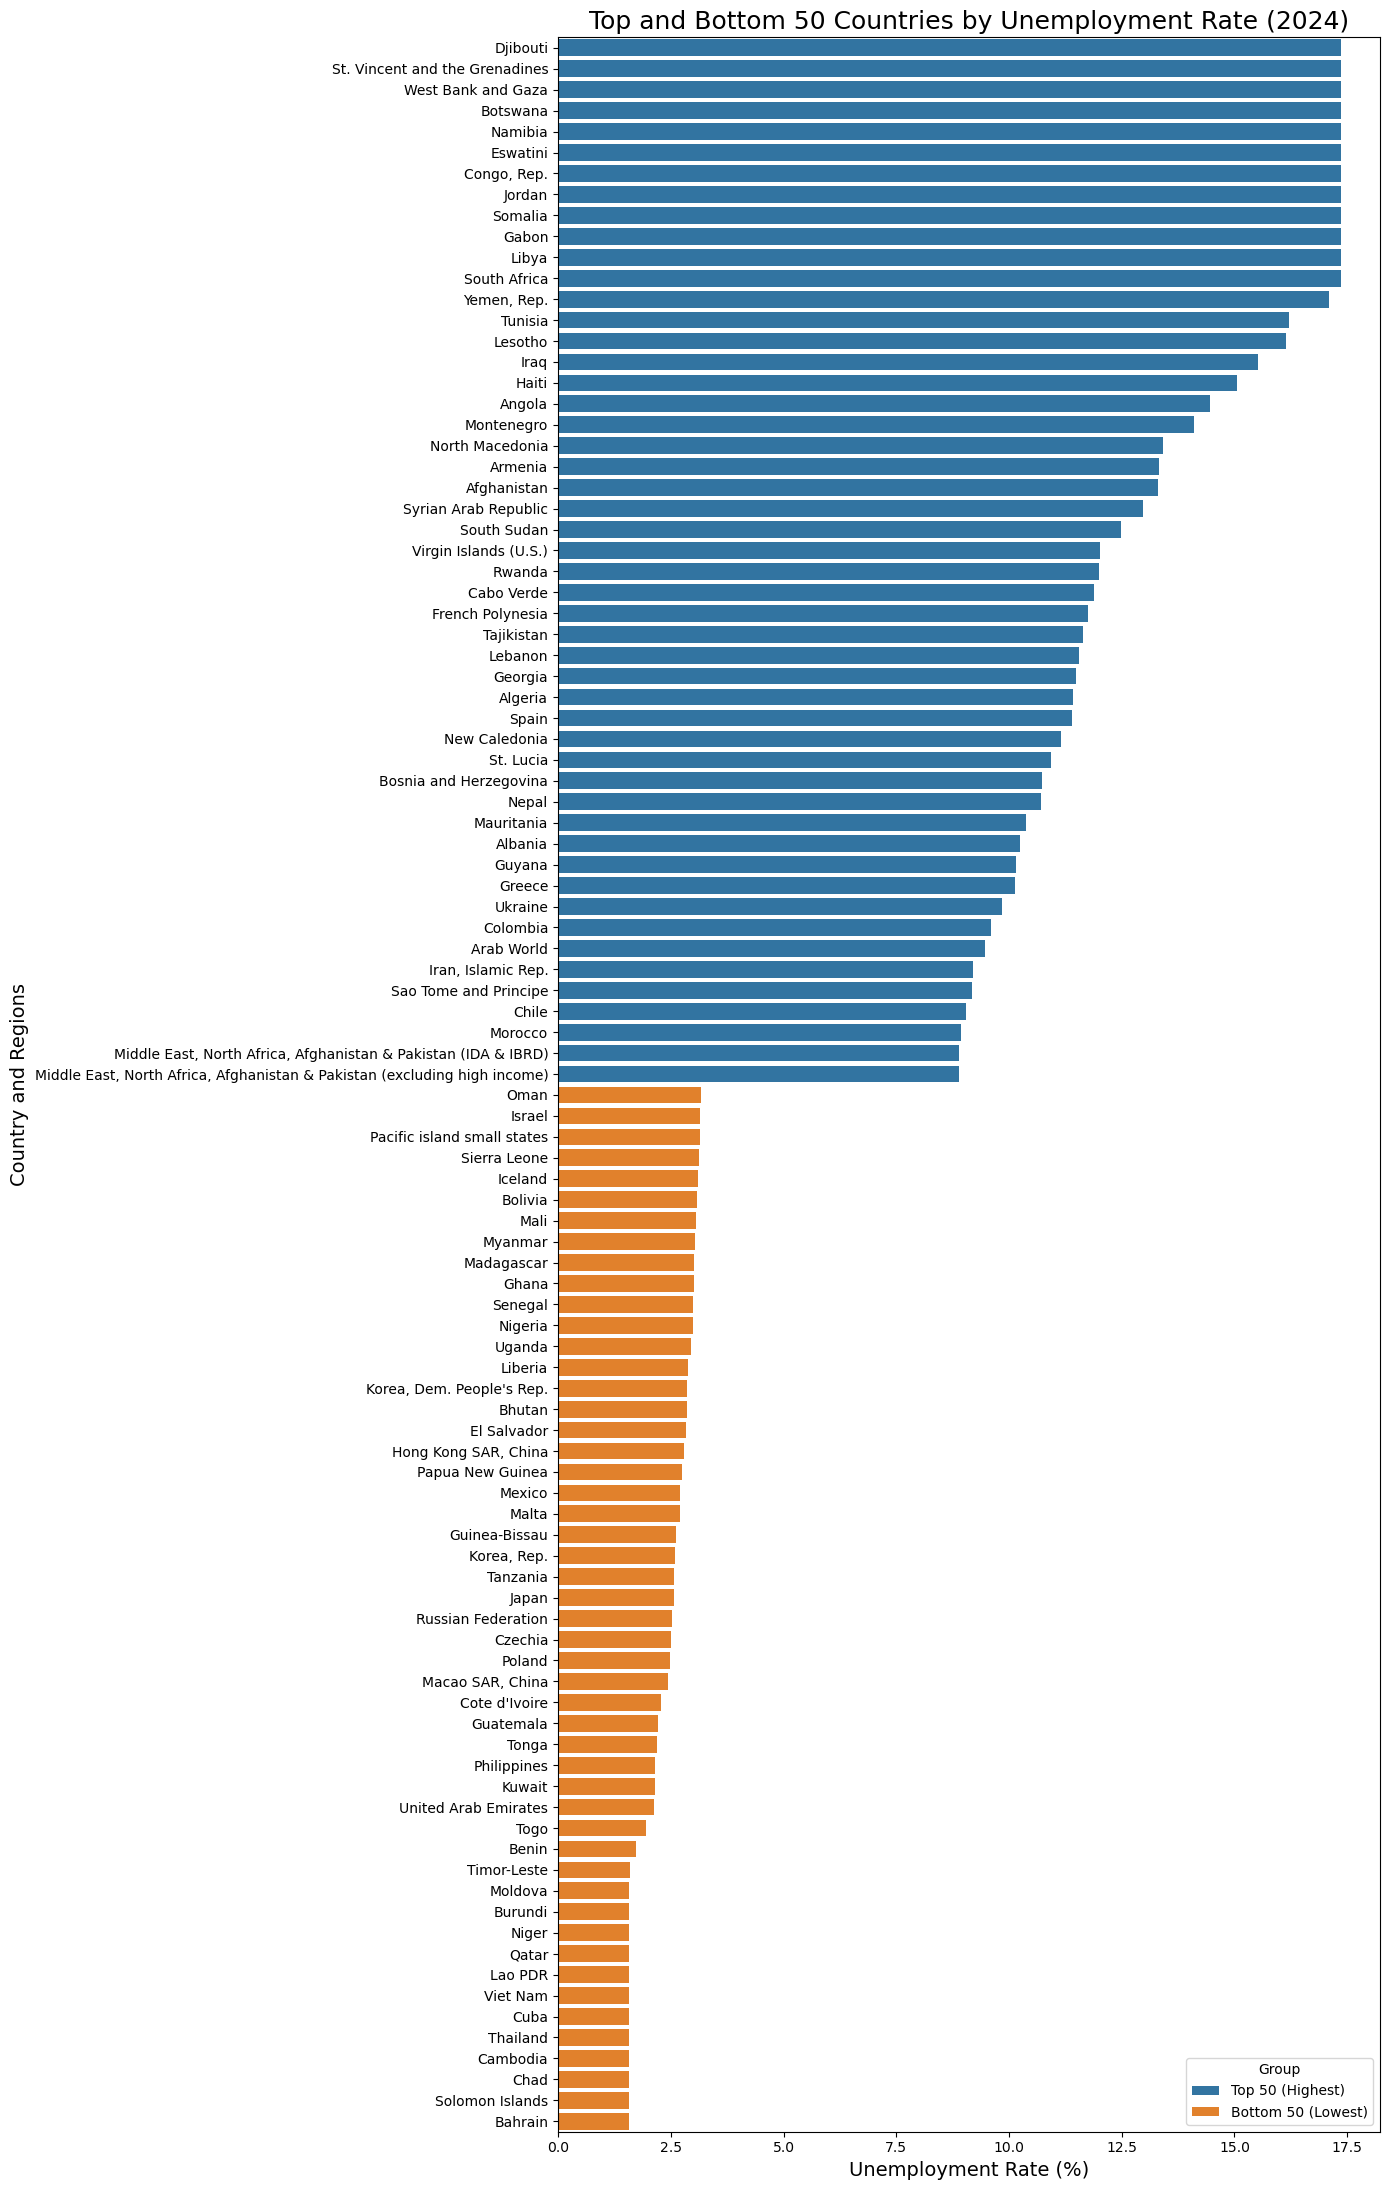

In [23]:
# This identifies countries with extreme unemployment rates in 2024, providing insight into economic disparities.
# Filter for 2024 and sort by unemployment rate
df_2024 = df_long[df_long['Year'] == 2024][['Country Name', 'Unemployment Rate']].sort_values(by='Unemployment Rate', ascending=False)

# Top 50 and bottom 50
top_50 = df_2024.head(50).copy()
bottom_50 = df_2024.tail(50).copy()

# Add group labels
top_50['Group'] = 'Top 50 (Highest)'
bottom_50['Group'] = 'Bottom 50 (Lowest)'

# Combine data
extreme_countries = pd.concat([top_50, bottom_50])

# Sort for visualization
extreme_countries = extreme_countries.sort_values(by='Unemployment Rate', ascending=False)

# Plot bar chart
plt.figure(figsize=(14, 22))  # taller for 100 countries
sns.barplot(
    data=extreme_countries, 
    x='Unemployment Rate', 
    y='Country Name', 
    hue='Group', 
    dodge=False
)

plt.title('Top and Bottom 50 Countries by Unemployment Rate (2024)', fontsize=18)
plt.xlabel('Unemployment Rate (%)', fontsize=14)
plt.ylabel('Country and Regions', fontsize=14)
plt.legend(title='Group')
plt.tight_layout()
plt.show()





#### 4.4 Regional Analysis

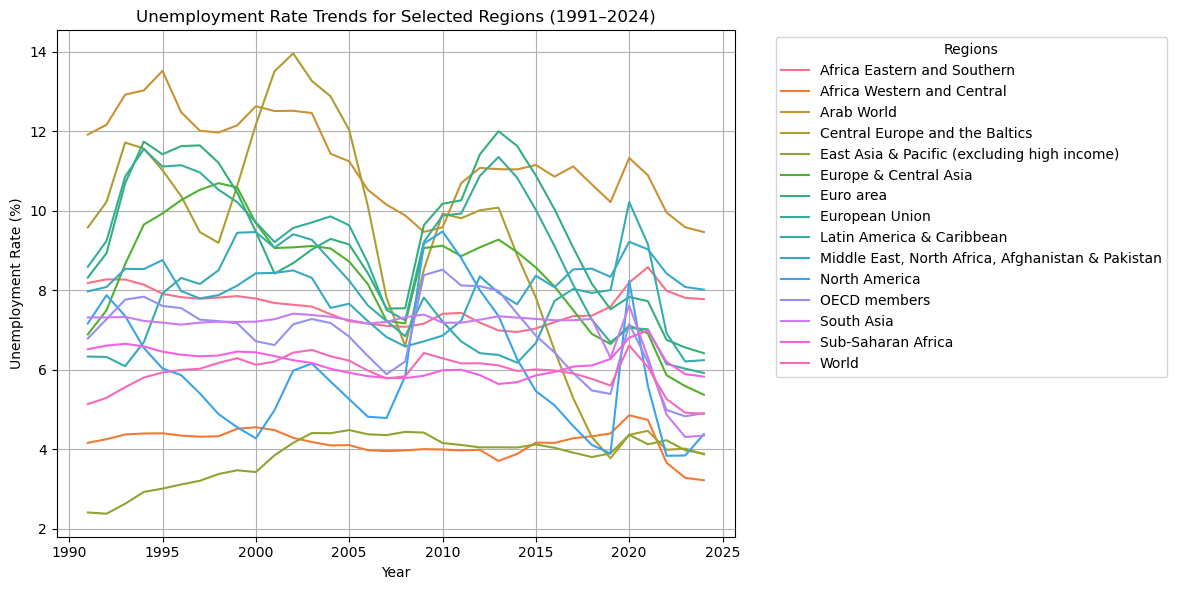

In [24]:
#Analyzing these provides a macro-level perspective,complementing country specific analyses.
# Plot unemployment trends for selected regions
selected_regions = [
    'Africa Eastern and Southern',
    'Africa Western and Central',
    'Arab World',
    'Central Europe and the Baltics',
    'East Asia & Pacific (excluding high income)',
    'Europe & Central Asia',
    'Euro area',
    'European Union',
    'Latin America & Caribbean',
    'Middle East, North Africa, Afghanistan & Pakistan',
    'North America',
    'OECD members',
    'South Asia',
    'Sub-Saharan Africa',
    'World'
]
df_selected = df_long[df_long['Country Name'].isin(selected_regions)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_selected, x='Year', y='Unemployment Rate', hue='Country Name')
plt.title('Unemployment Rate Trends for Selected Regions (1991–2024)')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.legend(title='Regions', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Step 5: Correlation Analysis
Examine correlations between unemployment rates across years to understand temporal relationships.

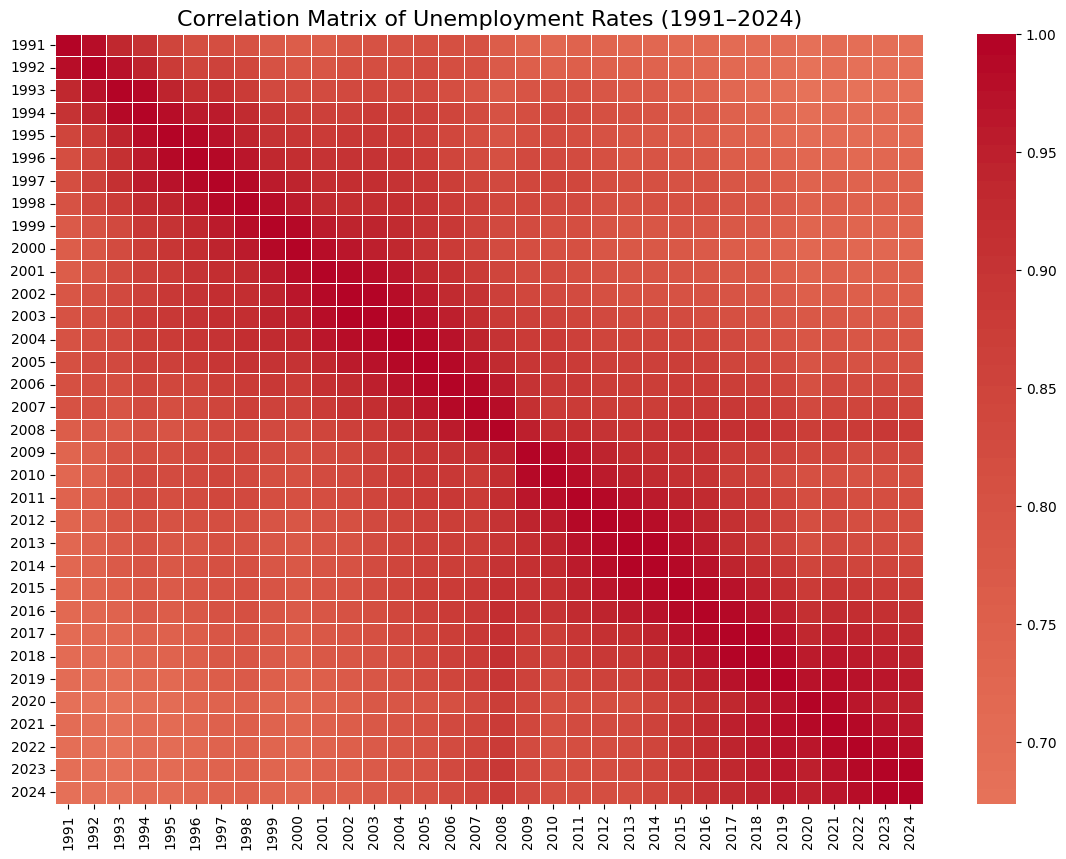

In [72]:
# The heatmap shows how unemployment rates in different years correlate, indicating whether high unemployment persists over time.
# Compute correlation matrix for unemployment rates across years
corr_matrix = df_cleaned[year_cols].corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False, linewidths=0.5)
plt.title('Correlation Matrix of Unemployment Rates (1991–2024)', fontsize=16)
plt.show()